**THIS NOTEBOOK CONTAINS FORECAST OF PAYMENT FOR SELLER 10 WITH TRANSACTION DATE ALONG WITH EXPLORATION OF DELAY OCCURING IN PAYMENTS..**

In [844]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Below is the importing of data file. It also includes changing the format of date time and extracting the date from it.**

In [845]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")
payment["TransactionDate"]=pd.to_datetime(pd.to_datetime(payment["TransactionDate"]).dt.date)
payment["PaymentDate"]=pd.to_datetime(pd.to_datetime(payment["PaymentDate"]).dt.date)

**The sample data is below consisting of payment details. The amount variable is a discontinuous one, It has several unavailable values.**

In [846]:
payment.head(30)

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Amount
0,2017-06-30,2017-07-19,87531,13,16140,74970.0
1,2017-06-30,2017-07-19,87531,13,16140,109841.0
2,2017-06-30,2017-07-19,87531,13,16140,51128.0
3,2017-06-30,2017-07-19,87531,13,16140,74630.0
4,2017-06-30,2017-07-19,87531,13,16140,299030.0
5,2017-06-30,2017-07-24,87531,13,16140,492469.0
6,2017-06-16,2017-07-25,87531,13,16147,276100.0
7,2017-07-28,2017-07-31,87531,13,16136,95175.0
8,2017-07-28,2017-08-02,87531,13,16146,128400.0
9,2016-04-30,2017-08-02,87531,10,15066,NaN


**Delay is the amount of days that a seller is waiting to get the payment from the buyer.**

In [847]:
payment["Delay"]=pd.to_datetime(payment.PaymentDate-payment.TransactionDate).dt.day

**Below shows the number of transactions that a seller has gone through.**

In [848]:
seller_count=payment.groupby("SellerId").count()

In [849]:
seller_count

,TransactionDate,PaymentDate,PaymentId,BuyerId,Amount,Delay
SellerId,,,,,,
1,3,3,3,3,2,3
2,597,597,597,597,560,597
3,96,96,96,96,88,96
5,1560,1560,1560,1560,1370,1560
6,32,32,32,32,24,32
8,1414,1541,1541,1541,1159,1414
9,2742,2742,2742,2742,2621,2742
10,18020,18020,18020,18020,17586,18020
11,3944,3944,3944,3944,3367,3944


**FORECAST FOR SELLER_10 WITHOUT INTERPOLATION**

**Following is the time series preparation for seller 10 by extracting transaction date and payment amount.**

In [850]:
sel=payment[payment.SellerId==10][["TransactionDate","Amount"]]
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="M")).sum()
sel["Amount"]=sel.Amount.apply(lambda x:int(x))
ts=sel["Amount"]

**This is the sample 10 datapoints for seller 10**

In [851]:
ts.head(10)

TransactionDate
2015-11-30        9000
2015-12-31        9000
2016-01-31           0
2016-02-29           0
2016-03-31      608865
2016-04-30     1152470
2016-05-31     3139485
2016-06-30    34058424
2016-07-31    33298404
2016-08-31    33498660
Freq: M, Name: Amount, dtype: int64

In [852]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_stats','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

**Testing the stationariy for the series by using Dickey Fuller test.**

In [853]:
dft(ts)

Results of Dickey-Fuller Test:
Test_stats                     -3.691394
p-value                         0.004236
#Lags Used                      5.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


**Clearly the Test_stats is already lesser than the minimum critical values. So with 99% confidence it can be inferred that the series is stationary.**

**Below is the preparation of input parameters for the ARIMA model to be applied on the series.**

In [854]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 

In [855]:
lag_acf = acf(ts, nlags=5)
lag_pacf = pacf(ts, nlags=5, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

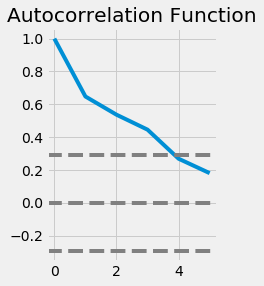

In [856]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
            

**From above plot it can be seen that plot is interesecting the upper confidence intervel at lag=4. so value of q is 4.**

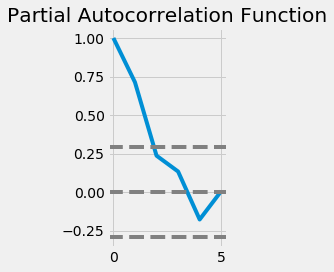

In [857]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**From above plot it can be seen that plot is interesecting the upper confidence intervel at lag=2. so value of p is 2.**

In [858]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(2, 0, 4))
#Though no differencing is applied in the series so d=0
model_fit = model.fit(disp=False)

**Following is the forecasted value of payment amount for coming 6 months for seller 10.**

In [859]:
pred_final= model_fit.predict(start="2019-07-31",end="2019-12-31")

**Below plot shows the actual values of payment amount and forecasted values for coming 6 months.**

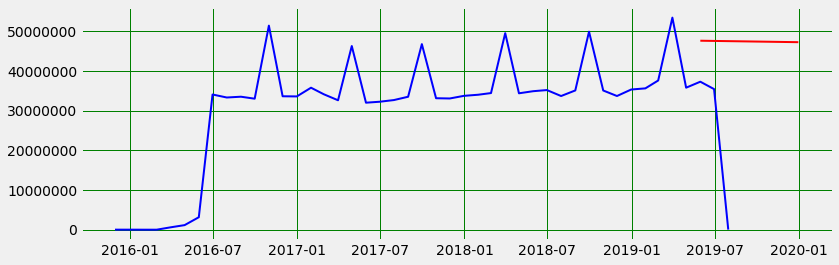

In [860]:
plt.figure(figsize=(12,4))
plt.plot(ts, color="blue", linewidth=2)
plt.plot(prediction_final,color="red", linewidth=2)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")

**FORECAST WITH INTERPOLATION**

In [861]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")
payment["TransactionDate"]=pd.to_datetime(pd.to_datetime(payment["TransactionDate"]).dt.date)
payment["PaymentDate"]=pd.to_datetime(pd.to_datetime(payment["PaymentDate"]).dt.date)

**INTERPOLATION STEPS**

In [862]:
payment=payment.interpolate()

In [863]:
payment.head(30)

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Amount
0,2017-06-30,2017-07-19,87531,13,16140,74970.000000
1,2017-06-30,2017-07-19,87531,13,16140,109841.000000
2,2017-06-30,2017-07-19,87531,13,16140,51128.000000
3,2017-06-30,2017-07-19,87531,13,16140,74630.000000
4,2017-06-30,2017-07-19,87531,13,16140,299030.000000
5,2017-06-30,2017-07-24,87531,13,16140,492469.000000
6,2017-06-16,2017-07-25,87531,13,16147,276100.000000
7,2017-07-28,2017-07-31,87531,13,16136,95175.000000
8,2017-07-28,2017-08-02,87531,13,16146,128400.000000
9,2016-04-30,2017-08-02,87531,10,15066,112833.333333


**After forecasting it can be observed that the missing values are filled.**

**Below is the prepared time series for seller 10**

In [864]:
sel=payment[payment.SellerId==10][["TransactionDate","Amount"]]
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="M")).sum()
sel["Amount"]=sel.Amount.apply(lambda x:int(x))
ts=sel["Amount"]

**This is the sample of time series.**

In [865]:
ts.head()

TransactionDate
2015-11-30      9000
2015-12-31    381987
2016-01-31    371428
2016-02-29    274642
2016-03-31    608865
Freq: M, Name: Amount, dtype: int64

**STATIOARITY TEST**

In [866]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [867]:
dft(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -4.260846
p-value                         0.000519
#Lags Used                      5.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


**The stats shows that series is stationary.**

**These are steps to find input parameters for the model.**

In [868]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 

In [869]:
lag_acf = acf(ts, nlags=5)
lag_pacf = pacf(ts, nlags=4, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

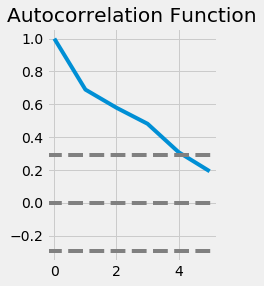

In [870]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

**From above plot q=4**

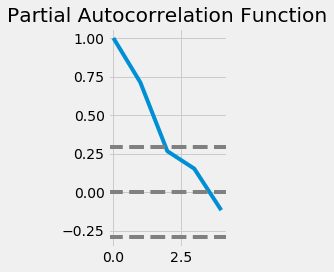

In [871]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**From above plot p=2.**

**Now applying the model**

In [872]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(2,0,4 ))
model_fit = model.fit(disp=False)

**Forecasted values of payment amount is calculated below.**

In [873]:
predicted_final= model_fit.predict(start="2019-05-31",end="2019-12-31")

**Following is the forecasted plot for seller 10 for coming 6 months of transaction.**

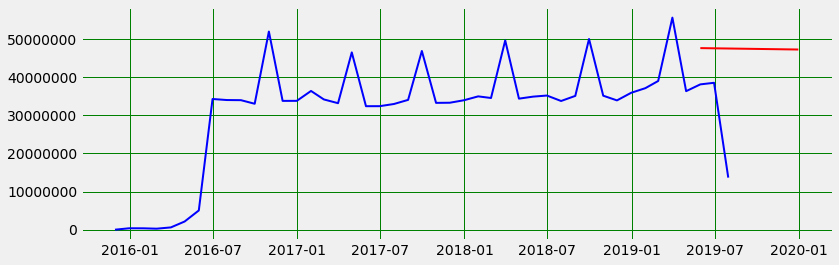

In [874]:
plt.figure(figsize=(12,4))
plt.plot(ts, color="blue", linewidth=2)
plt.plot(prediction_final,color="red", linewidth=2)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")

**DELAY ANALYSIS**

**Data preparation for delay**

In [875]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")
payment["TransactionDate"]=pd.to_datetime(pd.to_datetime(payment["TransactionDate"]).dt.date)
payment["PaymentDate"]=pd.to_datetime(pd.to_datetime(payment["PaymentDate"]).dt.date)

**Delay is duration in days a seller is waiting for getting the payment after the transaction.**

In [876]:
payment["Delay"]=pd.to_datetime(payment.PaymentDate-payment.TransactionDate).dt.day

**Now the data is consisting of delay information for each transaction.**

In [877]:
payment.head()

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Amount,Delay
0,2017-06-30,2017-07-19,87531,13,16140,74970.0,20.0
1,2017-06-30,2017-07-19,87531,13,16140,109841.0,20.0
2,2017-06-30,2017-07-19,87531,13,16140,51128.0,20.0
3,2017-06-30,2017-07-19,87531,13,16140,74630.0,20.0
4,2017-06-30,2017-07-19,87531,13,16140,299030.0,20.0


In [878]:
average_delay_per_transaction=payment.Delay.mean()

**This shows that for every transaction as on average the seller has to wait for more than 12 days.**

In [879]:
average_delay_per_transaction

12.292268408053916

**Below is calculation of average delay for each seller.**

In [880]:
average_delay_by_seller=payment.groupby("SellerId")["Delay"].mean()

**Below graph shows the distribution of average delay for individual sellers.**

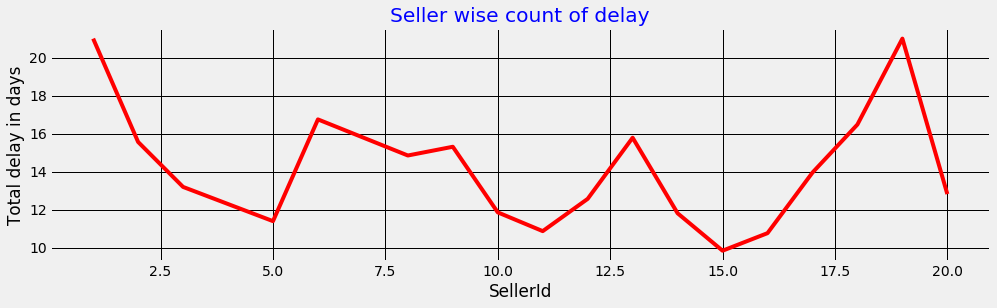

In [881]:
plt.figure(figsize=(15,4))
plt.plot(average_delay_by_seller,color="red")
plt.xlabel("SellerId")
plt.ylabel("Total delay in days")
plt.title("Seller wise count of delay", color="blue")
plt.grid(True, color="black")
plt.show()

**Above plot shows that seller 15 has suffered the minimum average delays while sellers 1 and 19 have high average delay in getting their payments.**